<a href="https://colab.research.google.com/github/elabedimene/Neural-Network/blob/main/RN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
 

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
dataset = pd.read_csv("/content/drive/MyDrive/ML/Iris.csv")

Mounted at /content/drive


In [ ]:
dataset.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
dataset.shape

(150, 6)

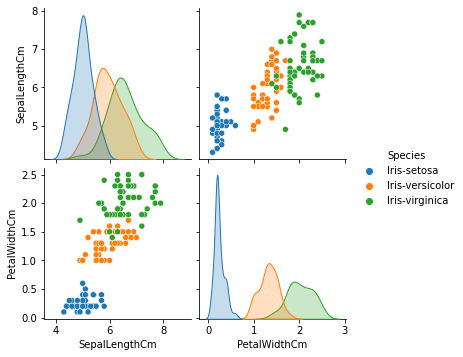

In [ ]:
#4
sns.pairplot(data=dataset, vars=('SepalLengthCm','PetalWidthCm') , hue='Species')
plt.show()

In [ ]:
#5
dataFrame = dataset.replace({'Species' : {'Iris-setosa':0, 'Iris-virginica':1, 'Iris-versicolor':2 }}, regex=True)


In [ ]:
dataFrame.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
5,6,5.4,3.9,1.7,0.4,0
6,7,4.6,3.4,1.4,0.3,0
7,8,5.0,3.4,1.5,0.2,0
8,9,4.4,2.9,1.4,0.2,0
9,10,4.9,3.1,1.5,0.1,0


In [ ]:
dataF=dataFrame['Species'] 
data=dataset.drop('Species',axis=1)
df=pd.concat([data,dataF],axis = 1)
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
5,6,5.4,3.9,1.7,0.4,0
6,7,4.6,3.4,1.4,0.3,0
7,8,5.0,3.4,1.5,0.2,0
8,9,4.4,2.9,1.4,0.2,0
9,10,4.9,3.1,1.5,0.1,0


In [ ]:
#7
y=df['Species'] 
x=df.drop('Species',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
x_test= x_test.drop('Id',axis=1)
x_train = x_train.drop('Id',axis=1)

In [ ]:
x_train.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
137,6.4,3.1,5.5,1.8
64,5.6,2.9,3.6,1.3
12,4.8,3.0,1.4,0.1
69,5.6,2.5,3.9,1.1
123,6.3,2.7,4.9,1.8
77,6.7,3.0,5.0,1.7
91,6.1,3.0,4.6,1.4
80,5.5,2.4,3.8,1.1
53,5.5,2.3,4.0,1.3
116,6.5,3.0,5.5,1.8


In [ ]:
x_test.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
113,5.7,2.5,5.0,2.0
147,6.5,3.0,5.2,2.0
15,5.7,4.4,1.5,0.4
50,7.0,3.2,4.7,1.4
98,5.1,2.5,3.0,1.1
128,6.4,2.8,5.6,2.1
89,5.5,2.5,4.0,1.3
68,6.2,2.2,4.5,1.5
44,5.1,3.8,1.9,0.4
65,6.7,3.1,4.4,1.4


In [ ]:
y_test.head()

113    1
147    1
15     0
50     2
98     2
Name: Species, dtype: int64

In [ ]:
y_train.head()

137    1
64     2
12     0
69     2
123    1
Name: Species, dtype: int64

In [ ]:
#9
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs',alpha=1e-05, epsilon=0.07, max_iter=150, random_state=0)
clf.fit(x_train, y_train)

MLPClassifier(alpha=1e-05, epsilon=0.07, max_iter=150, random_state=0,
              solver='lbfgs')

In [ ]:
#10
from sklearn import metrics
%time
train_score = clf.score(x_train, y_train)
print("Le score train est {}".format(train_score))
test_score = clf.score(x_test, y_test)
print("Le score en test est {}".format(test_score))

pred=clf.predict(x_test)
print('the accuracy is :',metrics.accuracy_score(pred,y_test))

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.15 µs
Le score train est 0.9904761904761905
Le score en test est 0.8666666666666667
the accuracy is : 0.8666666666666667


In [ ]:
print("predict values " , pred)

predict values  [1 1 0 2 2 1 2 1 0 2 1 1 1 2 2 0 2 2 2 2 2 1 0 1 1 0 1 0 0 0 0 1 2 2 0 2 2
 1 2 1 0 2 1 1 2]


In [ ]:
print("test values" , y_test.values)

test values [1 1 0 2 2 1 2 2 0 2 1 1 1 2 1 0 2 2 2 2 2 1 0 1 1 0 1 0 0 0 0 1 1 2 0 2 2
 2 2 1 0 1 1 1 1]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


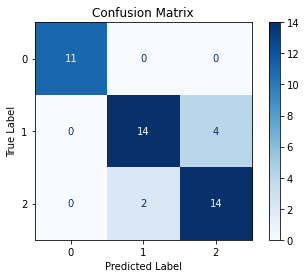

In [ ]:
#11
color = 'black'
matrix = plot_confusion_matrix(clf, x_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

12- Ce perceptron est performant ; il done une précision de 97%

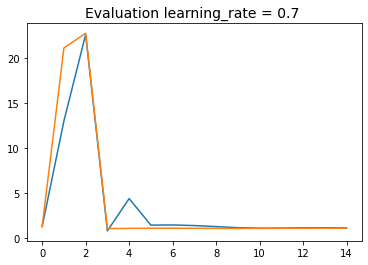

In [ ]:
#13
clf = MLPClassifier(solver='sgd' , max_iter=150, random_state=0,learning_rate_init=0.7,verbose=0 )
clf.fit(x_train, y_train)

plt.title("Evaluation learning_rate = 0.7 ",fontsize=14)
plt.plot(clf.loss_curve_)
clf.fit(x_test, y_test)
plt.plot(clf.loss_curve_)


In [ ]:
#14
params= [
    {
        "solver":"sgd",
        "learning_rate":"constant",
        "learning_rate_init":0.2,
        "max_iter":150,
    },
      {
        "solver":"sgd",
        "learning_rate":"constant",
        "learning_rate_init":0.7,
        "max_iter":300,
    },
  {
        "solver":"sgd",
        "learning_rate":"invscaling",
        "learning_rate_init":0.2,
        "max_iter":300,
    },
      {
        "solver":"sgd",
        "learning_rate":"invscaling",
        "learning_rate_init":0.7,
        "max_iter":150,
    },
    {
       "solver" :"adam",
       "learning_rate_init":0.01,
      "max_iter":300,

    },
]
labels= [
    "constant learning-rate_0.2",
    "constant learning-rate_0.7",
    "invscaling learning-rate_0.2",
    "invscaling learning-rate_0.7",
    "adam",

]
plot_args = [
    {"c":"red","linestyle":"-"},
    {"c":"green","linestyle":"-"},
    {"c":"blue","linestyle":"-"},
    {"c":"red","linestyle":"--"},
    {"c":"green","linestyle":"--"},
]


In [ ]:
mlps=[]

for label,param in zip(labels,params):
  print("training:%s" % label)
  mlp=MLPClassifier(random_state=0,**param)
  mlp.fit(x_train,y_train)
  mlps.append(mlp)
  print("Training  score : %f" % mlp.score(x_train,y_train))


training:constant learning-rate_0.2
Training  score : 0.371429
training:constant learning-rate_0.7
Training  score : 0.371429
training:invscaling learning-rate_0.2


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Training  score : 0.980952
training:invscaling learning-rate_0.7
Training  score : 0.980952
training:adam
Training  score : 0.990476


In [ ]:
mlps2=[]
for label,param in zip(labels,params):
  print("training:%s" % label)
  mlp=MLPClassifier(random_state=0,**param)
  mlp.fit(x_test,y_test)
  mlps2.append(mlp)
  print("Training set score : %f" % mlp.score(x_test,y_test))

training:constant learning-rate_0.2
Training set score : 0.644444
training:constant learning-rate_0.7
Training set score : 0.400000
training:invscaling learning-rate_0.2
Training set score : 0.955556
training:invscaling learning-rate_0.7
Training set score : 0.400000
training:adam
Training set score : 1.000000


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


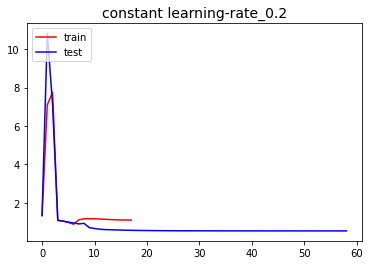

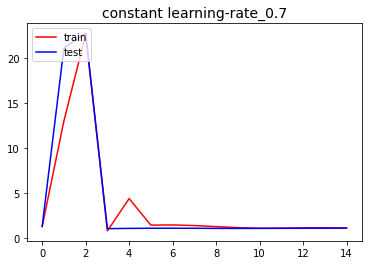

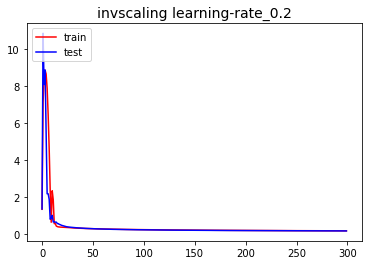

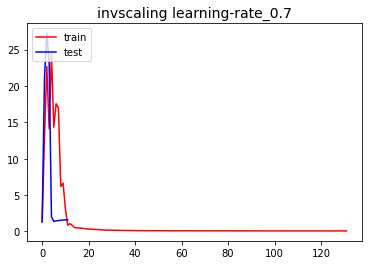

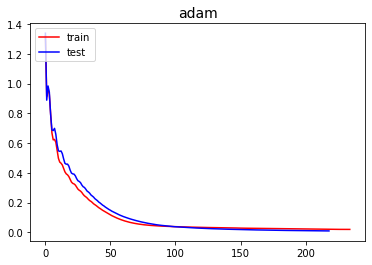

In [ ]:
for mlp1, mlp2, label, args in zip(mlps, mlps2,labels,plot_args):
  plt.plot(mlp1.loss_curve_ , 'r', label=label)
  plt.plot(mlp2.loss_curve_ , 'b', label=label)
  plt.title(label,fontsize=14)
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()


15-
 Si nous augmentons le nombre d’itérationsi 10 fois le réseau va s'entraîner trop longtemps, il pourrait causer le 'overfitting'.
Quand un tel événement se produit, le modèle prédictif pourra donner de très bonnes prédictions sur les données du Training Set  mais il prédira mal sur des données qu’il n’a pas encore vues lors de sa phase d’apprentissage.

Pour éviter le sur-appretissage nous pouvons :
* diviser notre ensemble de données en deux ensembles : l'entraînement et les tests. Un ratio de partage commun est de 80 % pour la formation et de 20 % pour les tests.
* Faire la sélection des fonctionnalités :
Si nous n'avons qu'un nombre limité d'échantillons d'apprentissage, chacun avec un grand nombre de fonctionnalités, nous ne devons sélectionner que les fonctionnalités les plus importantes pour la formation afin que notre modèle n'ait pas besoin d'apprendre pour autant de fonctionnalités et éventuellement de sur-adapter. 

#Recurrent Neural Network (RNN)

In [ ]:
!pip install  tensorflow keras  


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import keras 
from sklearn.preprocessing import normalize 
from keras.models import Sequential 
from keras.layers import Dense,Activation,Dropout 

from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
)
from keras.utils import np_utils

In [ ]:
dataR=df.iloc[np.random.permutation(len(data))]
print(dataR.head())


      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
57    58            4.9           2.4            3.3           1.0        2
55    56            5.7           2.8            4.5           1.3        2
12    13            4.8           3.0            1.4           0.1        0
107  108            7.3           2.9            6.3           1.8        1
46    47            5.1           3.8            1.6           0.2        0


In [ ]:
X=dataR.iloc[:,1:5].values
y=dataR.iloc[:,5].values

print("Shape of X",X.shape)
print("Shape of y",y.shape)
print("Examples of X\n",X[:3])
print("Examples of y\n",y[:3])

Shape of X (150, 4)
Shape of y (150,)
Examples of X
 [[4.9 2.4 3.3 1. ]
 [5.7 2.8 4.5 1.3]
 [4.8 3.  1.4 0.1]]
Examples of y
 [2 2 0]


In [ ]:
#Normalization
X_normalized=normalize(X,axis=0)

In [ ]:
total_length=len(data)
train_length=int(0.8*total_length)
test_length=int(0.2*total_length)

X_train=X_normalized[:train_length]
X_test=X_normalized[train_length:]
y_train=y[:train_length]
y_test=y[train_length:]

In [ ]:
y_train=np_utils.to_categorical(y_train,num_classes=3)
y_test=np_utils.to_categorical(y_test,num_classes=3)
print("Shape of y_train",y_train.shape)
print("Shape of y_test",y_test.shape)


Shape of y_train (120, 3)
Shape of y_test (30, 3)


In [ ]:
model=Sequential()
model.add(Dense(1000,input_dim=4,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=20,epochs=10)


Epoch 1/10
6/6 [==============================] - 1s 55ms/step - loss: 1.0771 - accuracy: 0.4667 - val_loss: 1.0382 - val_accuracy: 0.4333
Epoch 2/10
6/6 [==============================] - 0s 14ms/step - loss: 0.9909 - accuracy: 0.7417 - val_loss: 0.8793 - val_accuracy: 0.9000
Epoch 3/10
6/6 [==============================] - 0s 14ms/step - loss: 0.8369 - accuracy: 0.8750 - val_loss: 0.6733 - val_accuracy: 0.9000
Epoch 4/10
6/6 [==============================] - 0s 17ms/step - loss: 0.6439 - accuracy: 0.8750 - val_loss: 0.5017 - val_accuracy: 1.0000
Epoch 5/10
6/6 [==============================] - 0s 22ms/step - loss: 0.4565 - accuracy: 0.9333 - val_loss: 0.3234 - val_accuracy: 1.0000
Epoch 6/10
6/6 [==============================] - 0s 17ms/step - loss: 0.3282 - accuracy: 0.9167 - val_loss: 0.2120 - val_accuracy: 1.0000
Epoch 7/10
6/6 [==============================] - 0s 17ms/step - loss: 0.2659 - accuracy: 0.9250 - val_loss: 0.2227 - val_accuracy: 0.9667
Epoch 8/10
6/6 [===========

In [ ]:
prediction=model.predict(X_test)
length=len(prediction)
y_label=np.argmax(y_test,axis=1)
predict_label=np.argmax(prediction,axis=1)
accuracy=np.sum(y_label==predict_label)/length * 100 
print("Accuracy =",accuracy )

1/1 [==============================] - 0s 102ms/step
Accuracy = 90.0


#17
**Non dans notre cas de base de donnée Iris,il n'est pas intéressant d’avoir un réseau de neurones récurrent 
car pour les RNN Les valeurs d'une action dépendent largement des valeurs qu'elle avait précédemment ; les données sont des séquences et  les données à un instant t dépendent des données à l'instant t-1.**
